In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def Gram_Schmidt_QR(A):
    n = A.shape[0]
    
    A_transp = A.T
    Q = []
    
    R = np.zeros_like(A, dtype=float)
    
    Q.append(A_transp[0] / np.linalg.norm(A_transp[0]))

    for k in range(1,n):
        Q.append(A_transp[k] - sum([(Q[i] @ A_transp[k]) * Q[i] for i in range(k)]))
        Q[k] = np.array(Q[k] / np.linalg.norm(Q[k]))
    Q = np.array(Q).T
    
    for i in range(n):
        for j in range(i, n):
            R[i,j] = Q[:,i] @ A[:,j]
            
    return Q, R

Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze.

In [64]:
def test_QR_factor(n=3, max_val=1000000):
    A = np.random.randint(max_val, size=(n,n))
    Q, R = Gram_Schmidt_QR(A)
    return np.all(np.isclose(np.eye(n), Q.T @ Q)) and np.all(np.isclose(A, Q @ R))

In [65]:
test_QR_factor()

True

In [70]:
test_QR_factor(10)

True

In [67]:
test_QR_factor(100)

True

In [69]:
test_QR_factor(400)

True

In [68]:
test_QR_factor(1000)

True

Wygeneruj 30-50 przykładowych macierzy 8×8 o różnym wskaźniku uwarunkowania (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

# Zadanie 2: Rozwiązywanie układów równań metodą QR
Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR. Następnie
wykorzystaj ją do rozwiązania problemu aproksymacji średniokwadratowej dla zbioru
punktów podanego tabeli poniżej. Przyjmij model postaci:
f(x) = α0 + α1x + α2x^2
Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja aproksymująca f).

In [135]:
x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
y = np.array([2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4])

In [136]:
A = np.array([np.ones(len(x)), x, np.vectorize(lambda x: x*x)(x)]).T

In [137]:
A

array([[  1.,  -5.,  25.],
       [  1.,  -4.,  16.],
       [  1.,  -3.,   9.],
       [  1.,  -2.,   4.],
       [  1.,  -1.,   1.],
       [  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.]])

In [140]:
Q, R = np.linalg.qr(A)

In [146]:
b = y.T
res = np.linalg.solve(R, Q.T @ b)

In [151]:
def f(x, res):
    return x + res[0] + res[1] * x + res[2] * x ** 2
y2 = [f(z, res) for z in x]

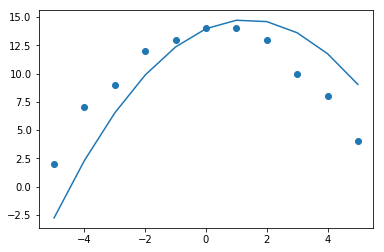

In [152]:
plt.scatter(x,y)
plt.plot(x,y2)
plt.show()